**Space X Falcon 9 Birinci Aşama İniş Tahmini**
**Görsel**

Çoğu başarısız iniş planlıdır. SpaceX, okyanusa kontrollü iniş gerçekleştirmektedir.

---

### **Amaçlar**

* Keşifsel Veri Analizi (EDA) gerçekleştirmek ve Eğitim Etiketlerini (Training Labels) belirlemek
* **class** için bir sütun oluşturmak
* Veriyi standardize etmek
* Eğitim ve test verisine ayırmak
* SVM (Destek Vektör Makineleri), Sınıflandırma Ağaçları ve Lojistik Regresyon için en iyi hiperparametreleri bulmak
* Test verisi kullanılarak hangi yöntemin en iyi performansı gösterdiğini belirlemek


**Kütüphaneleri içe aktarmak ve yardımcı fonksiyonları tanımlamak**



In [1]:
# Pandas, Python programlama dili için yazılmış bir yazılım kütüphanesidir ve veri işleme ile analiz için kullanılır.
import pandas as pd

# NumPy, Python programlama dili için çok boyutlu diziler (array) ve matrisler üzerinde işlemler yapmayı sağlayan matematiksel fonksiyonları içeren bir kütüphanedir.
import numpy as np

# Matplotlib, Python için bir çizim kütüphanesidir ve pyplot, MatLab benzeri bir çizim arayüzü sağlar. Verileri görselleştirmek için plotter fonksiyonumuzda kullanacağız.
import matplotlib.pyplot as plt

# Seaborn, matplotlib tabanlı bir Python veri görselleştirme kütüphanesidir. İstatistiksel verileri görsel olarak çekici ve bilgilendirici şekilde çizmek için yüksek seviyeli bir arayüz sağlar.
import seaborn as sns

# Preprocessing, verimizi standartlaştırmamıza (normalize etmemize) olanak tanır.
from sklearn import preprocessing

# Verimizi eğitim ve test verisi olarak ayırmamızı sağlar.
from sklearn.model_selection import train_test_split

# Sınıflandırma algoritmalarının parametrelerini test etmemizi ve en iyisini bulmamızı sağlar.
from sklearn.model_selection import GridSearchCV

# Lojistik Regresyon sınıflandırma algoritması
from sklearn.linear_model import LogisticRegression

# Destek Vektör Makineleri (Support Vector Machine - SVM) sınıflandırma algoritması
from sklearn.svm import SVC

# Karar Ağaçları (Decision Trees) sınıflandırma algoritması
from sklearn.tree import DecisionTreeClassifier

# En Yakın Komşular (K Nearest Neighbors - KNN) sınıflandırma algoritması
from sklearn.neighbors import KNeighborsClassifier


In [2]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

In [3]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [5]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### **GÖREV 1**

`data` veri çerçevesindeki **Class** sütunundan bir NumPy dizisi (array) oluşturun.

Bunu yapmak için `to_numpy()` metodunu kullanın ve sonucu **Y** değişkenine atayın.

Çıktının bir Pandas serisi (Series) olduğundan emin olun – yani sütuna yalnızca **tek bir köşeli parantez** (`df['sütun_adi']`) ile erişin.


In [6]:
Y = data["Class"].to_numpy()

In [7]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

### **GÖREV 2**

**X** içindeki verileri standardize edin ve ardından elde edilen veriyi tekrar **X** değişkenine atayın.
Aşağıda verilen `transform` işlemini kullanarak bu işlemi gerçekleştirin.


In [8]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

Veriyi **eğitim** ve **test** verisi olarak ayırmak için `train_test_split` fonksiyonu kullanılır.

Eğitim verisi daha sonra **doğrulama verisine** bölünür; bu ikinci veri kümesi eğitim sırasında kullanılır.

Ardından modeller eğitilir ve hiperparametreler, `GridSearchCV` fonksiyonu kullanılarak seçilir.


### **GÖREV 3**

`train_test_split` fonksiyonunu kullanarak **X** ve **Y** verilerini **eğitim** ve **test** verisi olarak ayırın.
Aşağıdaki parametreleri kullanın:

* `test_size` değerini **0.2** olarak ayarlayın (verinin %20’si test için ayrılır),
* `random_state` değerini **2** olarak ayarlayın (aynı sonuçların tekrarlanabilmesi için).

Eğitim ve test verilerini aşağıdaki değişkenlere atayın:

```python
X_train, X_test, Y_train, Y_test
```


### **X nedir?**

🔹 **Girdi verisi (özellikler / bağımsız değişkenler)**
Modelin tahmin yapabilmesi için kullandığı veridir.
Örneğin Falcon 9 roketi için bu sütunlar şunlar olabilir:

* Roketin tipi
* Roketin itme gücü
* Hangi yörüngeye gideceği
* Hangi tarihte fırlatıldığı
* Hangi platformdan fırlatıldığı
* vs.

👉 Bunların hepsi **X**’te yer alır.

---

### **Y nedir?**

🔹 **Çıktı verisi (etiket / bağımlı değişken)**
Modelin tahmin etmeye çalıştığı şeydir.
Falcon 9 örneğinde bu, roketin **başarılı bir şekilde iniş yapıp yapmadığı** bilgisidir.

* 1 → Başarılı iniş
* 0 → Başarısız iniş

👉 Bu veri **Y**’de yer alır.


In [9]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=2)

**Yalnızca 18 test örneğimiz olduğunu görebiliyoruz.**


In [10]:
Y_test.shape

(18,)

### **GÖREV 4**

Önce bir **lojistik regresyon (logistic regression)** nesnesi oluşturun.

Ardından `cv = 10` olacak şekilde bir **GridSearchCV** nesnesi (**logreg\_cv**) oluşturun.

Son olarak, bu nesneyi **fit** ederek, **parameters** adlı sözlükten en iyi hiperparametreleri bulun.


In [11]:
# Lojistik regresyon için hiperparametreler:
parameters = {
    "C": [0.01, 0.1, 1],   # C değeri, düzenleme (regularization) parametresi: küçük C → daha güçlü düzenleme
    'penalty': ['l2'],      # ceza türü: 'l2' Ridge (Tikhonov) düzenlemesi
    'solver': ['lbfgs']     # model optimizasyon algoritması
}  # 'l1' Lasso, 'l2' Ridge düzenlemesi için kullanılır
#Bu parametre değerleri genellikle deneysel olarak, literatürde önerilen aralıklar ve algoritmanın özelliklerine göre belirlenir. GridSearchCV bu değerleri deneye deneye en iyi performans veren parametreyi bulmaya çalışır.

lr = LogisticRegression()  # Lojistik Regresyon modeli oluşturuldu

# GridSearchCV nesnesi oluşturuluyor:
# - lr modeli kullanılır
# - parameters sözlüğündeki parametreler denenir
# - cv=10 ile 10 katlı çapraz doğrulama yapılır
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# GridSearchCV modelini X_train ve Y_train verileriyle eğitiyoruz,
# en iyi parametreleri bulmak için
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

Lojistik regresyon için oluşturulan **GridSearchCV** nesnesini çıktı olarak veriyoruz.
    
En iyi hiperparametreleri `best_params_` özelliği ile,
doğrulama (validation) verisi üzerindeki doğruluk (accuracy) skorunu ise `best_score_` özelliği ile görüntülüyoruz.


In [12]:
print("Ayarlanmış hiperparametreler (en iyi parametreler): ", logreg_cv.best_params_)
print("Doğruluk (accuracy) : ", logreg_cv.best_score_)


Ayarlanmış hiperparametreler (en iyi parametreler):  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Doğruluk (accuracy) :  0.8464285714285713


### **GÖREV 5**

Test verisi üzerindeki doğruluk (accuracy) değerini, `score` metodunu kullanarak hesaplayın.


In [13]:
logreg_accuracy = logreg_cv.score(X_test, Y_test)
print("Test verisi doğruluğu:", logreg_accuracy)


Test verisi doğruluğu: 0.8333333333333334


**Hadi karışıklık matrisi (confusion matrix) bakalım:**


In [14]:
from sklearn.metrics import confusion_matrix

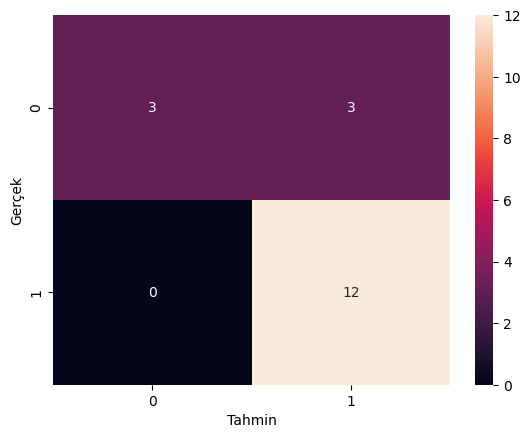

In [15]:
yhat = logreg_cv.predict(X_test)  # Test verisi X_test için modelin tahminlerini yapıyoruz

# Gerçek test etiketleri (Y_test) ile model tahminleri (yhat) kullanılarak karışıklık matrisi hesaplanıyor
cm = confusion_matrix(Y_test, yhat)

# Karışıklık matrisi bir ısı haritası (heatmap) olarak görselleştiriliyor
# annot=True ile hücre içi değerler gösteriliyor, fmt='d' ile tam sayı formatında yazdırılıyor
sns.heatmap(cm, annot=True, fmt='d')

# X eksenine 'Tahmin', Y eksenine 'Gerçek' etiketleri ekleniyor
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')

# Grafik ekranda gösteriliyor
plt.show()



Karışıklık matrisi incelendiğinde, lojistik regresyonun farklı sınıfları ayırt edebildiğini görüyoruz.
Sorunun **yanlış pozitiflerde (false positives)** olduğu gözlemleniyor.

Özet:

* **Doğru Pozitif (True Positive)** - 12
  (Gerçek etiket iniş yapıldı, model de iniş olarak tahmin etti)

* **Yanlış Pozitif (False Positive)** - 3
  (Gerçek etiket iniş yapılmadı, model iniş olarak tahmin etti)

### **GÖREV 6**

Öncelikle bir **destek vektör makinesi (Support Vector Machine - SVM)** nesnesi oluşturun.
    
Ardından, `cv=10` olacak şekilde bir **GridSearchCV** nesnesi (**svm\_cv**) oluşturun.

Son olarak, bu nesneyi `parameters` adlı sözlükten en iyi parametreleri bulmak için **fit** edin.


In [16]:
# SVM modelinde denenecek hiperparametreler:

parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),  
    # 'kernel' fonksiyonu: farklı çekirdek tipleri,
    # linear: doğrusal, rbf: radyal tabanlı fonksiyon,
    # poly: polinom, sigmoid: sigmoid fonksiyonu,

    'C': np.logspace(-3, 3, 5),  
    # Düzenleme (regularization) parametresi,
    # 0.001’den 1000’e kadar logaritmik aralıkta 5 değer,
    # Küçük C güçlü düzenleme, büyük C daha az düzenleme demek.

    'gamma': np.logspace(-3, 3, 5)  
    # Kernelin etkisi için gamma parametresi,
    # Yine 0.001’den 1000’e kadar logaritmik aralıkta 5 değer.
}

# Destek Vektör Makinesi (SVM) sınıflandırıcı nesnesi oluşturuluyor
svm = SVC()


### `np.logspace(-3, 3, 5)` ne demek?

* `np.logspace(start, stop, num)` fonksiyonu, **10'un start** kuvvetinden başlayıp, **10'un stop** kuvvetine kadar, aralarında eşit logaritmik aralıklarla `num` tane sayı üretir.

* Burada:

  * `start = -3` yani $10^{-3} = 0.001$
  * `stop = 3` yani $10^{3} = 1000$
  * `num = 5` yani arada 5 tane sayı olacak.


In [17]:
# GridSearchCV nesnesi oluşturuluyor:
# - estimator olarak svm modeli kullanılıyor
# - param_grid ile denenecek parametreler veriliyor
# - cv=10 ile 10 katlı çapraz doğrulama yapılacak
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

# GridSearchCV nesnesi eğitim verileri üzerinde fit edilerek
# en iyi parametre kombinasyonu bulunuyor
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [18]:
# GridSearchCV ile bulunan en iyi hiperparametreleri ekrana yazdırır
print("Ayarlanmış hiperparametreler (en iyi parametreler): ", svm_cv.best_params_)

# En iyi parametrelerle doğrulama verisi üzerinde elde edilen doğruluk skorunu ekrana yazdırır
print("Doğruluk (accuracy) : ", svm_cv.best_score_)


Ayarlanmış hiperparametreler (en iyi parametreler):  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Doğruluk (accuracy) :  0.8482142857142856


### **GÖREV 7**

Test verisi üzerinde doğruluk (accuracy) değerini, `score` metodunu kullanarak hesaplayınız.


In [19]:
svm_accuracy = svm_cv.score(X_test,Y_test)
print("Test verisi doğruluğu:", svm_accuracy)

Test verisi doğruluğu: 0.8333333333333334


**Karışıklık matrisini (confusion matrix) çizebiliriz.**


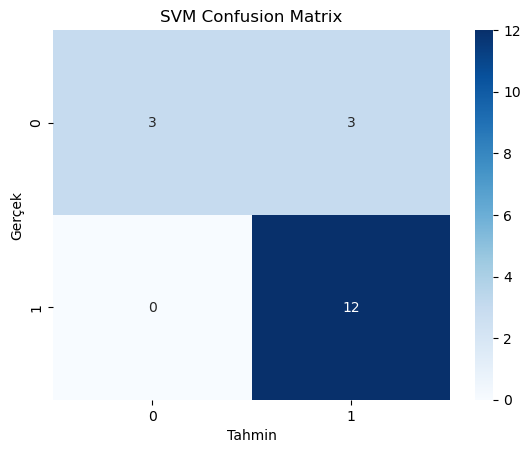

In [20]:
# Test verisi üzerinde tahmin yapıyoruz
yhat = svm_cv.predict(X_test)

# Gerçek ve tahmin edilen değerlerden karışıklık matrisi oluşturuyoruz
cm = confusion_matrix(Y_test, yhat)

# Karışıklık matrisini ısı haritası (heatmap) olarak çiziyoruz
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#annot=True, fmt='d' birlikte kullanıldığında, karışıklık matrisindeki tam sayı değerler grafik üzerine yazılır. 
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('SVM Confusion Matrix')
plt.show()

### **GÖREV 8**

Bir karar ağacı (Decision Tree) sınıflandırıcı nesnesi oluşturun.

Ardından, `cv=10` olacak şekilde bir GridSearchCV nesnesi (**tree\_cv**) oluşturun.

Son olarak, bu nesneyi `parameters` adlı sözlükten en iyi parametreleri bulmak için **fit** edin.


In [21]:
# Karar ağacı sınıflandırıcısı için denenecek hiperparametreler:

parameters = {
    'criterion': ['gini', 'entropy'],  
    # Bölme kalitesini ölçen kriterler:
    # 'gini' (Gini impurity), 'entropy' (bilgi kazancı)

    'splitter': ['best', 'random'],  
    # Dallanma için hangi stratejinin kullanılacağı:
    # 'best' en iyi bölmeyi seçer, 'random' rastgele seçim yapar

    'max_depth': [2*n for n in range(1,10)],  
    # Ağacın maksimum derinliği, 2’den 18’e kadar çift sayılar
    # Derinlik arttıkça model daha karmaşık olur

    'max_features': ['auto', 'sqrt'],  
    # Her bölmede göz önüne alınacak özellik sayısı:
    # 'auto' tüm özellikler, 'sqrt' özelliklerin karekökü

    'min_samples_leaf': [1, 2, 4],  
    # Bir yaprak düğümde bulunması gereken minimum örnek sayısı

    'min_samples_split': [2, 5, 10]  
    # Bir düğümün bölünebilmesi için gereken minimum örnek sayısı
}

# Karar ağacı sınıflandırıcısı nesnesi oluşturuluyor
tree = DecisionTreeClassifier()


In [22]:
# GridSearchCV nesnesi oluşturuluyor (10 katlı çapraz doğrulama)
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Model, eğitim verisi üzerinde fit edilerek en iyi parametreler bulunuyor
tree_cv.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pac

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [23]:
# GridSearchCV ile bulunan en iyi hiperparametreleri yazdırır
print("Ayarlanmış hiperparametreler (en iyi parametreler): ", tree_cv.best_params_)

# En iyi parametrelerle doğrulama verisi üzerinde elde edilen doğruluk skorunu yazdırır
print("Doğruluk (accuracy): ", tree_cv.best_score_)


Ayarlanmış hiperparametreler (en iyi parametreler):  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Doğruluk (accuracy):  0.8625


### **GÖREV 9**

`tree_cv` modeli ile test verisi üzerinde doğruluk (accuracy) değerini `score` metodunu kullanarak hesaplayınız.


In [24]:
tree_accuracy = tree_cv.score(X_test, Y_test)
print("Test verisi doğruluğu:", tree_accuracy)


Test verisi doğruluğu: 0.5555555555555556


**Karışıklık matrisini (confusion matrix) çizebiliriz.**


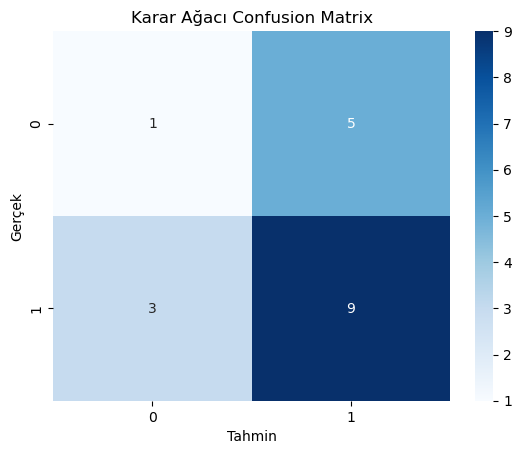

In [25]:
# Test verisi üzerinde tahmin yapıyoruz
yhat = tree_cv.predict(X_test)

# Gerçek ve tahmin edilen değerlerden karışıklık matrisi oluşturuyoruz
cm = confusion_matrix(Y_test, yhat)

# Karışıklık matrisini ısı haritası (heatmap) olarak çiziyoruz
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Karar Ağacı Confusion Matrix')
plt.show()

### **GÖREV 10**

Bir k-en yakın komşu (K-Nearest Neighbors - KNN) sınıflandırıcı nesnesi oluşturun.
    
Sonra, `cv=10` olacak şekilde bir GridSearchCV nesnesi (**knn\_cv**) oluşturun.

Ardından, bu nesneyi `parameters` adlı sözlükteki parametrelerle en iyi parametreleri bulmak için eğitin (fit edin).


In [26]:
# KNN modeli için denenecek hiperparametreler:

parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  
    # Komşu sayısı, yani sınıflandırma için kaç en yakın nokta dikkate alınacak

    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    # Komşuları bulmak için kullanılan algoritma:
    # 'auto' uygun algoritmayı otomatik seçer
    # 'ball_tree', 'kd_tree' ve 'brute' farklı arama algoritmaları

    'p': [1, 2]  
    # Minkowski mesafesi için güç parametresi:
    # p=1 → Manhattan mesafesi
    # p=2 → Öklid mesafesi
}

# KNN sınıflandırıcısı nesnesi oluşturuluyor
KNN = KNeighborsClassifier()


In [27]:
# GridSearchCV nesnesi oluşturuluyor, 10 katlı çapraz doğrulama yapılacak
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)
# Model eğitim verisi üzerinde fit edilerek en iyi parametreler bulunuyor
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [28]:
# GridSearchCV ile bulunan en iyi hiperparametreleri ekrana yazdırır
print("Ayarlanmış hiperparametreler (en iyi parametreler): ", knn_cv.best_params_)

# En iyi parametrelerle doğrulama verisi üzerinde elde edilen doğruluk skorunu ekrana yazdırır
print("Doğruluk (accuracy): ", knn_cv.best_score_)

Ayarlanmış hiperparametreler (en iyi parametreler):  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Doğruluk (accuracy):  0.8482142857142858


### **GÖREV 11**

`knn_cv` modeli ile test verisi üzerinde doğruluk (accuracy) değerini `score` metodunu kullanarak hesaplayınız.


In [29]:
knn_accuracy = knn_cv.score(X_test, Y_test)
print("Test verisi doğruluğu:", knn_accuracy)

Test verisi doğruluğu: 0.8333333333333334


**Karışıklık matrisini çizebiliriz.**


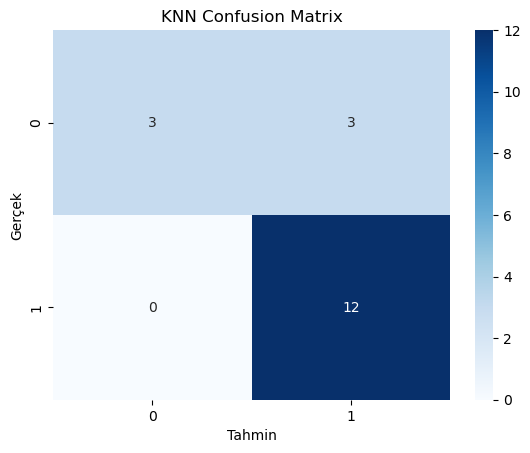

In [30]:
# Test verisi üzerinde tahmin yapıyoruz
yhat = knn_cv.predict(X_test)

# Gerçek ve tahmin edilen değerlerle karışıklık matrisi oluşturuluyor
cm = confusion_matrix(Y_test, yhat)

# Karışıklık matrisi görselleştiriliyor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('KNN Confusion Matrix')
plt.show()

### **GÖREV 12**

En iyi performans gösteren yöntemi bulun.


In [42]:
models = {
    'Logistic Regression': logreg_cv,
    'SVM': svm_cv,
    'Decision Tree': tree_cv,
    'KNN': knn_cv
}

for name, model_cv in models.items():
    print(f"{name} CV Score: {model_cv.best_score_:.4f}")
    test_score = model_cv.score(X_test, Y_test)
    print(f"{name} Test Score: {test_score:.4f}")
    print('-'*30)


Logistic Regression CV Score: 0.8464
Logistic Regression Test Score: 0.8333
------------------------------
SVM CV Score: 0.8482
SVM Test Score: 0.8333
------------------------------
Decision Tree CV Score: 0.8625
Decision Tree Test Score: 0.5556
------------------------------
KNN CV Score: 0.8482
KNN Test Score: 0.8333
------------------------------



### Analiz:

* **Decision Tree** modeli çapraz doğrulamada (CV Score) en yüksek skoru almış (0.8625), ama test skorunda çok düşük kalmış (0.5556). Bu durum genellikle aşırı öğrenme (overfitting) işaretidir; model eğitim verisine çok uyarken, yeni veride başarısız oluyor.

* **Logistic Regression, SVM ve KNN** modellerinin hem CV skorları hem de test skorları birbirine çok yakın ve tutarlı (yaklaşık %83.3 test doğruluğu).

* **Decision Tree**’yi elerken, kalan üç model arasında test skorları eşit olduğu için, genellikle:

  * Daha stabil olan (örneğin, genelleme performansı daha tutarlı),
  * Daha az karmaşık ve hızlı çalışan model tercih edilir.

---

### Öneri:

* **Logistic Regression, SVM veya KNN** modelleri arasında karar verirken:

  * İş problemin ve veri yapın önemli.
  * Örneğin, Logistic Regression yorumlanabilirliği yüksek, hızlıdır.
  * SVM ve KNN biraz daha karmaşık olabilir.

* Eğer sadece doğruluk önemliyse ve test skorları eşitse, **Logistic Regression** tercih edilebilir (daha basit ve hızlıdır).

* Ancak başka metrikler (precision, recall, f1-score) önemliyse, onları da hesaplayıp karar vermelisin.
